In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결
plt.rcParams["font.family"] = 'AppleGothic' # Mac
# plt.rcParams["font.family"] = 'Malgun Gothic' # Windows

In [200]:
# HN16_ALL : 가구조사, 건강면접조사, 건강형태조사, 검진조사, 영양조사
# HN16_24RC : 식품섭취조사
# HN16_FFQ : 식품섭취빈도조사
# pandas에서 dataframe으로 sas 파일 읽을 때 "b'2018.02.01.'"이런 식으로 불러오는 것 방지하기 위해 
df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat')
#df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding="utf-8")
#df_24RC = pd.read_sas("./HN16_24RC.sas7bdat")
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat')
#df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat', encoding="utf-8")
# df_24RC_code = pd.read_excel("./HN16_24RC(식품_음식코드).xlsx")

In [201]:
#df = pd.merge(df_ALL, df_ffq, how='outer')
df = pd.merge(df_ALL, df_ffq, how='left', on=[
                                  'mod_d', # 최종DB 수정일
                                  'ID', # 개인 아이디
                                  'ID_fam', # 가구 아이디
                                  'year', # 조사연도
                                  'region', # 17개 시도
                                  'town_t', # 동/읍면 구분
                                  'apt_t', # 아파트 구분, 1.일반, 2.아파트
                                  'psu', # 조사구번호
                                  'sex', # 성별, 1.남자, 2.여자
                                  'age', # 만나이, 80은 80이상 포함(탑코딩)
                                  'age_month', # 만 1~6세의 경우 개월수(월령)
                                  'incm', # 소득 사분위수(개인), 1.하, 2.중하, 3.중상, 4.상
                                  'ho_incm', # 소득 사분위수(가구),  1.하, 2.중하, 3.중상, 4.상
                                  'edu', # 교육수준 재분류 코드, 1.초졸이하, 2.중졸, 3.고졸, 4.대졸이상
                                  'occp', # 직업재분류 및 실업/비경제활동 상태코드
                                  'wt_hs', # 가구조사 가중치
                                  'wt_itvex', # 건강설문-검진조사 가중치
                                  'wt_pft', # 폐기능검사 가중치(만40세이상)
                                  'wt_hm', # 중금속검사 가중치(만10세이상)
                                  'wt_ntr', # 영양조사 가중치
                                  'wt_tot', # 건강설문-검진조사 & 영양조사 가중치
                                  'wt_pfhm', # 폐기능검사 & 중금속검사 가중치(만40세이상)
                                  'wt_pfnt', # 폐기능검사 & 영양조사 가중치(만40세이상)
                                  'wt_hmnt', # 중금속검사 & 영양조사 가중치(만10세이상)
                                  'wt_pfhmnt', # 폐기능검사 & 중금속검사 & 영양조사 가중치(만40세이상)
                                  'kstrata' # 분산추정 층
                                 ])

In [202]:
df.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
0,b'2018.02.01.',b'A651172801',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2018.02.01.',b'A651172802',b'A6511728',2016.0,1.0,1.0,2.0,b'A651',2.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2018.02.01.',b'A651183001',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2018.02.01.',b'A651183002',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2018.02.01.',b'A651183003',b'A6511830',2016.0,1.0,1.0,2.0,b'A651',2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
df.shape

(8150, 1176)

In [204]:
# 최종DB수정일, 조사연도 삭제
del df['mod_d']
del df['year']

In [205]:
df.shape

(8150, 1174)

In [206]:
# 전체 데이터를 만 19세~64세 까지로만 구성하여 dataframe 재 구성
df_over18 = df.loc[df.age > 18, :]
df_under65 = df_over18.loc[df.age < 65, :]
df = df_under65

In [207]:
print(df.shape)
df.head(3)

(4750, 1174)


,ID,ID_fam,region,town_t,apt_t,psu,sex,age,age_month,incm,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
0,b'A651172801',b'A6511728',1.0,1.0,2.0,b'A651',1.0,61.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'A651172802',b'A6511728',1.0,1.0,2.0,b'A651',2.0,57.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'A651183001',b'A6511830',1.0,1.0,2.0,b'A651',2.0,41.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


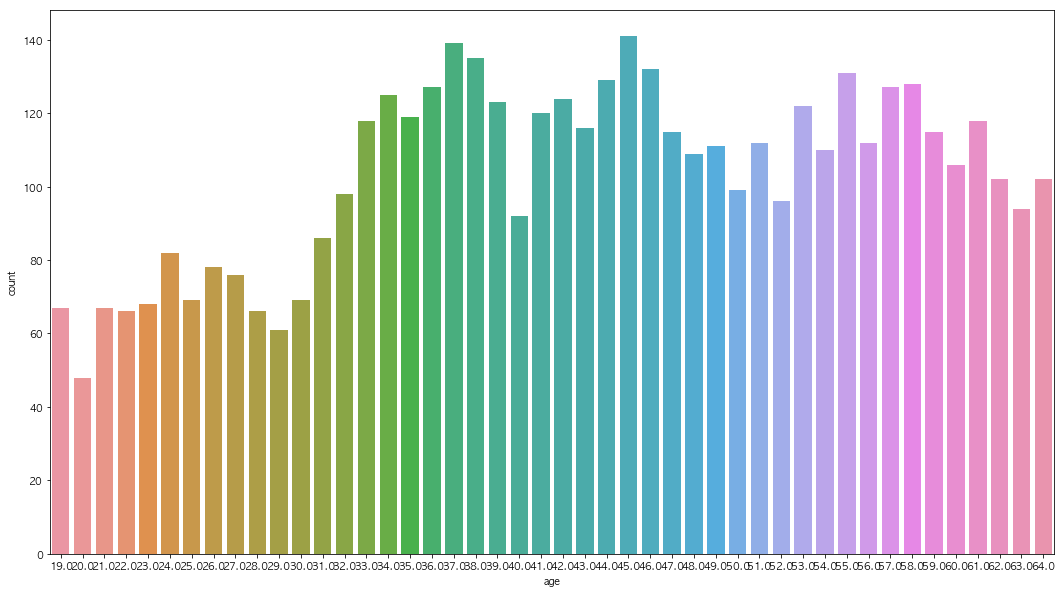

In [208]:
# 나이별 countplot
f,ax=plt.subplots(1,1,figsize=(18,10))
sns.countplot('age', data=df)
plt.show()

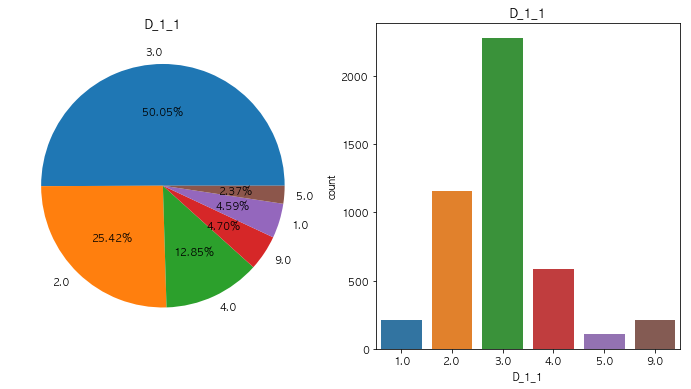

In [209]:
# 주관적 건강상태
# 1. 매우 좋음
# 2. 좋음
# 3. 보통
# 4. 나쁨
# 5. 매우 나쁨
# 9. 모름, 무응답

f,ax=plt.subplots(1,2,figsize=(12,6))
col = 'D_1_1'
col_name = "D_1_1"

# 비율
df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

# count
sns.countplot(col, data=df, ax=ax[1])
ax[1].set_title(col_name)
plt.show()

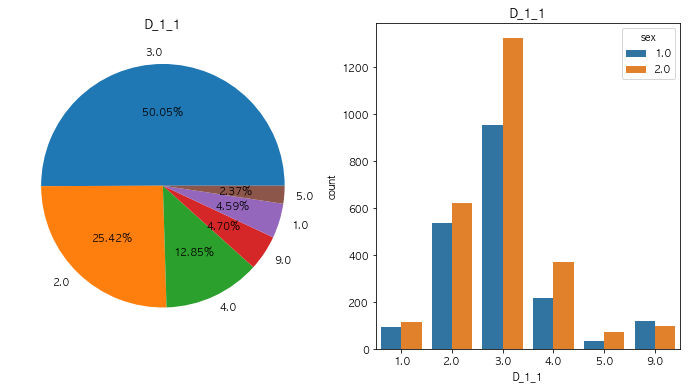

In [210]:
# 주관적 건강상태 (성별)
# 1. 매우 좋음
# 2. 좋음
# 3. 보통
# 4. 나쁨
# 5. 매우 나쁨
# 9. 모름, 무응답

f,ax=plt.subplots(1,2,figsize=(12,6))
col = 'D_1_1'
col_name = "D_1_1"

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(col, hue="sex", data=df, ax=ax[1])
ax[1].set_title(col_name)
plt.show()

In [213]:
# 나이 그룹 지정
df.loc[:, "age_group"] = pd.cut(df.loc[:, 'age'], 
                         bins  = [19, 29, 39, 49, 59, 69],
                         labels=["20대", "30대", "40대", "50대", "60대"],
                         right = False).copy()

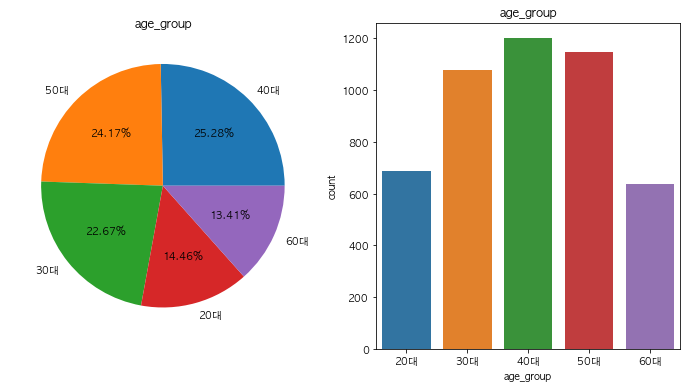

In [221]:
#나이대

f,ax=plt.subplots(1,2,figsize=(12,6))
col = 'age_group'
col_name = "age_group"

# 비율
df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

# count
sns.countplot(col, data=df, ax=ax[1])
ax[1].set_title(col_name)
plt.show()

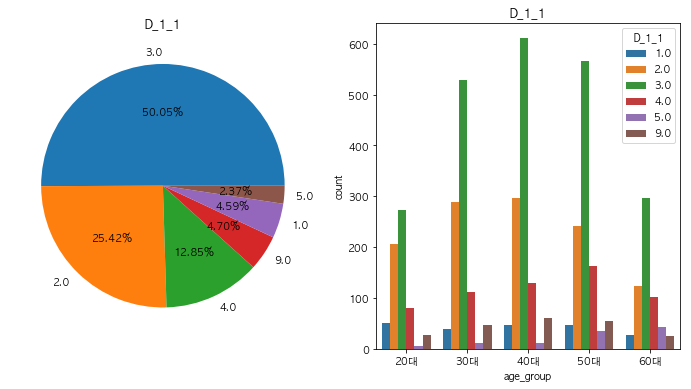

In [220]:
# 주관적 건강상태 (나이별)
# 1. 매우 좋음
# 2. 좋음
# 3. 보통
# 4. 나쁨
# 5. 매우 나쁨
# 9. 모름, 무응답

col = 'D_1_1'
col_name = "D_1_1"
bins = "age_group"

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col_name)
plt.show()

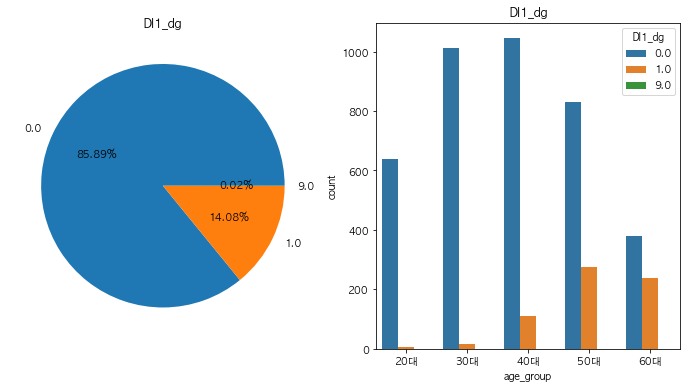

In [222]:
#나이대에 따른 고혈압 진단여부

# 0. 없음
# 1. 있음
# 8. 비해당(청소년, 소아) 
# 9. 모름, 무응답

col = 'DI1_dg'
col_name = "DI1_dg"
bins = "age_group" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col)
plt.show()

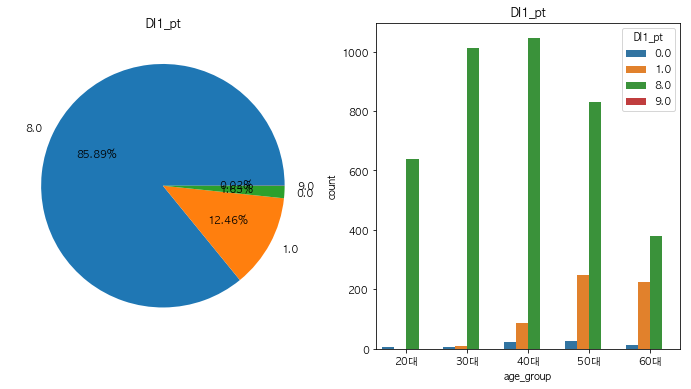

In [223]:
#나이대에 따른 혈압 치료

# 0. 없음
# 1. 있음
# 8. 비해당(청소년, 소아, 의사진단 받지 않음)
# 9. 모름, 무응답

col = 'DI1_pt'
col_name = "DI1_pt"
bins = "age_group" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col)
plt.show()

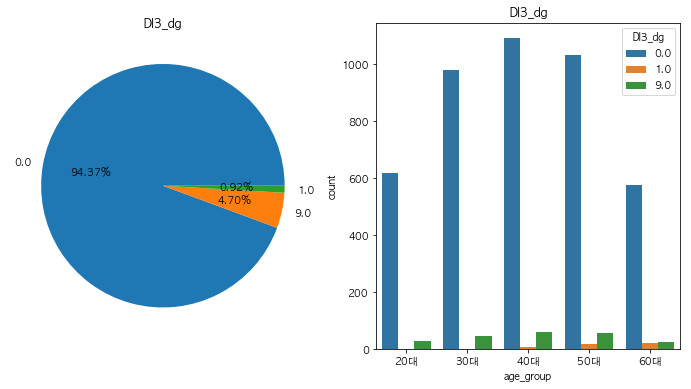

In [224]:
#나이대에 따른 뇌졸중 의사진단여부

# 0. 없음
# 1. 있음
# 8. 비해당(청소년, 소아) 
# 9. 모름, 무응답

col = 'DI3_dg'
col_name = "DI3_dg"
bins = "age_group" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col)
plt.show()

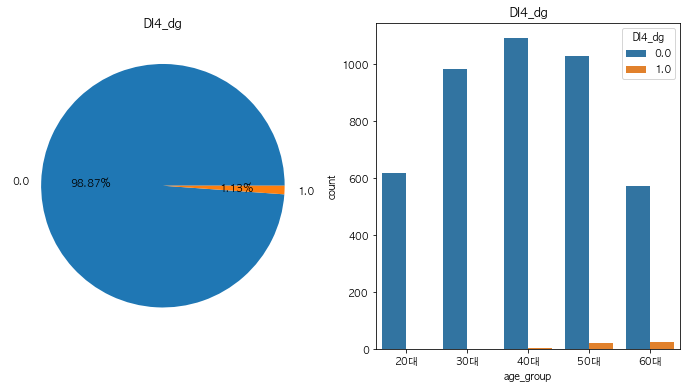

In [225]:
#나이대에 따른 심근경색증 또는 협심증 의사진단 여부

# 0. 없음
# 1. 있음
# 8. 비해당(청소년, 소아) 

col = 'DI4_dg'
col_name = "DI4_dg"
bins = "age_group" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col)
plt.show()

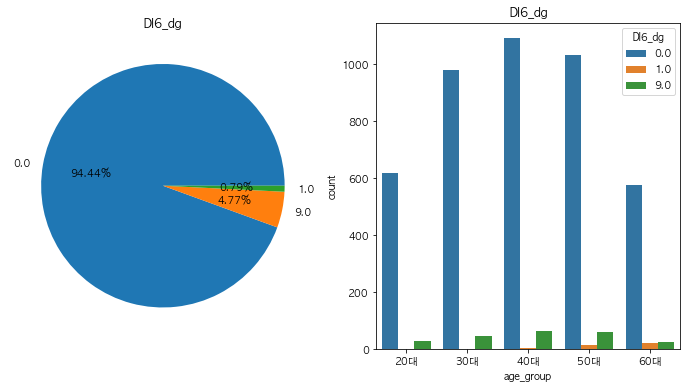

In [226]:
#나이대에 따른 협심증 의사진단 여부

# 0. 없음
# 1. 있음
# 8. 비해당(청소년, 소아) 
# 9. 모름, 무응답

col = 'DI6_dg'
col_name = "DI6_dg"
bins = "age_group" 

f,ax=plt.subplots(1,2,figsize=(12,6))

df[col].value_counts().plot.pie(explode=None, autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(col_name)
ax[0].set_ylabel('')

sns.countplot(bins, hue=col, data=df, ax=ax[1])
ax[1].set_title(col)
plt.show()

In [115]:
# 19~64세까지 나이로만 csv 파일 작성
df.to_csv("df_age.csv", header=True, index=True)